In [1]:
from Funcs.Utility import *

In [2]:
p = os.path.join(PATH_INTERMEDIATE, 'calorie_count_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [3]:
X

,PIF#participationStartTimestamp,PIF#age,PIF#openness,PIF#conscientiousness,PIF#neuroticism,PIF#extraversion,PIF#agreeableness,PIF#GHQ12,PIF#PSS10,PIF#CESD-R,...,PWR#RLV_SUP_TodayAfternoon,PWR#ETP#_TodayLateAfternoon,PWR#ASC#_TodayLateAfternoon,PWR#RLV_SUP_TodayLateAfternoon,PWR#ETP#_TodayEvening,PWR#ASC#_TodayEvening,PWR#RLV_SUP_TodayEvening,PWR#ETP#_TodayNight,PWR#ASC#_TodayNight,PWR#RLV_SUP_TodayNight
0,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21615,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21616,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21617,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [5]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [6]:
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPU

In [7]:
unique_parts = set()
for col in cn:
    part = col.split('#')[0]  # Get the part before the first '#'
    unique_parts.add(part)

# Print the unique parts
print(unique_parts)

{'MSG_SNT', 'MSG_RCV', 'SCR_EVENT', 'Sleep', 'BAT_STA', 'PWR', 'Time', 'Notification_VIS', 'DATA_MRCV', 'CHG', 'INST_JAC', 'APP_CAT', 'BT_BondState', 'DATA_MSNT', 'DATA_SNT', 'CALL_CNT', 'BAT_TMP', 'BT_classType', 'BT_DeviceType', 'Dozemode', 'BAT_LEV', 'MSG_ALL', 'APP_DUR_UNKNOWN', 'RING', 'LOC_LABEL', 'DATA_RCV', 'SCR_DUR', 'BAT_PLG', 'Notification_CAT', 'CALL_DUR', 'PIF'}


In [8]:
new_set = set()

# Loop through the original set
for item in unique_parts:
    # Split the string by underscore and take the first part
    split_item = item.split('_')[0]
    # Add the first part to the new set
    new_set.add(split_item)

# Output the new set
print(new_set)

{'APP', 'MSG', 'CALL', 'CHG', 'Sleep', 'Notification', 'BAT', 'INST', 'Dozemode', 'LOC', 'PWR', 'Time', 'BT', 'DATA', 'SCR', 'PIF', 'RING'}


In [9]:
import itertools

# The categorized elements
categories = {
    'Application Related': ['APP'],
    'Communication Related': ['CALL', 'MSG', 'RING', 'BT'],
    'Device Status Related': ['SCR', 'PWR', 'CHG'],
    'Battery Related': ['BAT'],
    'Location Related': ['LOC'],
    'Time Related': ['Time'],
    'Notification Related': ['Notification'],
    'Sleep Related': ['Sleep', 'Dozemode'],
    'Miscellaneous': ['PIF', 'INST']
}

# Convert the categories dictionary keys to a list
category_list = list(categories.keys())

# Dictionary to store combinations of categories
category_combinations = {}

# Loop through lengths from 2 to the total number of categories
for r in range(3, len(category_list) + 1):
    # Generate all combinations of categories of length r
    combinations = list(itertools.combinations(category_list, r))
    # Store the combinations in the dictionary with length as the key
    category_combinations[r] = combinations

# Example of how to access or print the category combinations
for length, combs in category_combinations.items():
    print(f"Combinations of {length} categories:")
    for comb in combs:
        print(comb)
    print("\n")

Combinations of 3 categories:
('Application Related', 'Communication Related', 'Device Status Related')
('Application Related', 'Communication Related', 'Battery Related')
('Application Related', 'Communication Related', 'Location Related')
('Application Related', 'Communication Related', 'Time Related')
('Application Related', 'Communication Related', 'Notification Related')
('Application Related', 'Communication Related', 'Sleep Related')
('Application Related', 'Communication Related', 'Miscellaneous')
('Application Related', 'Device Status Related', 'Battery Related')
('Application Related', 'Device Status Related', 'Location Related')
('Application Related', 'Device Status Related', 'Time Related')
('Application Related', 'Device Status Related', 'Notification Related')
('Application Related', 'Device Status Related', 'Sleep Related')
('Application Related', 'Device Status Related', 'Miscellaneous')
('Application Related', 'Battery Related', 'Location Related')
('Application Relat

In [10]:
# # Ensure the directory exists
# if not os.path.exists(PATH_SAVE_COMBI):
#     os.makedirs(PATH_SAVE_COMBI)

# # Convert the categories dictionary keys to a list
# category_list = list(categories.keys())

# # Loop through lengths from 2 to the total number of categories
# for r in range(3, 5):
#     # Generate all combinations of categories of length r
#     combinations = list(itertools.combinations(category_list, r))
    
#     # Iterate over each combination
#     for comb in combinations:
#         # Collect relevant columns
#         selected_columns = []
#         for category in comb:
#             features = categories[category]
#             for feature in features:
#                 matching_columns = [col for col in X.columns if col.startswith(feature)]
#                 selected_columns.extend(matching_columns)
        
#         # Create a new DataFrame with the selected columns
#         new_feature_space = X[selected_columns]
        
#         # Save the new DataFrame
#         combination_name = '_'.join(comb)
#         save_path = os.path.join(PATH_SAVE_COMBI, f'{combination_name}_features.csv')
#         new_feature_space.to_csv(save_path, index=False)
        
#         print(f"Saved new feature space for combination: {combination_name} with columns: {selected_columns}")

In [11]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from tqdm import tqdm
import ray
import os
import gc  # Import garbage collector

# Initialize Ray for parallel processing
ray.init(num_cpus=6)

logo = LeaveOneGroupOut()

# Path to save the combinations
PATH_SAVE_COMBI = '/var/nfs_share/Overfitting/D-4/Intermediate/Save_COMBI/'
PATH_SAVE_RESULTS = '/var/nfs_share/Overfitting/D-4/Intermediate/Results_combinations_objective/'

# Ensure the results directory exists
os.makedirs(PATH_SAVE_RESULTS, exist_ok=True)

# Get list of saved feature combination files
feature_files = [f for f in os.listdir(PATH_SAVE_COMBI) if f.endswith('_features.csv')]

@ray.remote
def train_and_evaluate(file_name, X, y, groups, path_save_combi, path_save_results):
    feature_space = pd.read_csv(os.path.join(path_save_combi, file_name))
    feature_columns = feature_space.columns.tolist()
    
    X_subset = X[feature_columns]
    aucs = []

    for train_idx, test_idx in logo.split(X_subset, y, groups):
        X_train, X_test = X_subset.iloc[train_idx], X_subset.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = XGBClassifier(eval_metric='logloss', random_state=42, nthread=1)  # Limit XGBoost threads
        model.fit(X_train, y_train)
        
        y_pred_prob = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred_prob)
        aucs.append(auc)
    
    # Save the result immediately after processing
    result = {
        'combination': file_name,
        'mean_auc': np.mean(aucs)
    }
    
    # Save result to a CSV file
    result_df = pd.DataFrame([result])
    result_file_name = f"result_{os.path.splitext(file_name)[0]}.csv"
    result_df.to_csv(os.path.join(path_save_results, result_file_name), index=False)
    
    # Clear memory
    del feature_space, X_subset, model, X_train, X_test, y_train, y_test, y_pred_prob, aucs
    gc.collect()
    
    return result

# Process combinations
futures = [train_and_evaluate.remote(file_name, X, y, groups, PATH_SAVE_COMBI, PATH_SAVE_RESULTS) for file_name in feature_files]

# Collect and process results
results = []
for future in tqdm(ray.get(futures), total=len(futures), desc="Processing Combinations"):
    results.append(future)

# Sort results and print the top 10
results_sorted = sorted(results, key=lambda x: x['mean_auc'], reverse=True)

for result in results_sorted[:10]:
    print(f"Combination: {result['combination']}, Mean AUC: {result['mean_auc']:.4f}")

# Shutdown Ray
ray.shutdown()


2024-08-22 14:32:27,720	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8266 
Processing Combinations: 100%|███████████████████████████████████████████████████| 210/210 [00:00<00:00, 2067614.65it/s]


Combination: Device Status Related_Battery Related_Location Related_Sleep Related_features.csv, Mean AUC: 0.7295
Combination: Device Status Related_Battery Related_Location Related_features.csv, Mean AUC: 0.7290
Combination: Device Status Related_Battery Related_Location Related_Time Related_features.csv, Mean AUC: 0.7271
Combination: Application Related_Device Status Related_Battery Related_Location Related_features.csv, Mean AUC: 0.7269
Combination: Communication Related_Device Status Related_Battery Related_Location Related_features.csv, Mean AUC: 0.7269
Combination: Device Status Related_Battery Related_Location Related_Notification Related_features.csv, Mean AUC: 0.7267
Combination: Communication Related_Device Status Related_Battery Related_Notification Related_features.csv, Mean AUC: 0.7265
Combination: Device Status Related_Battery Related_Time Related_features.csv, Mean AUC: 0.7247
Combination: Device Status Related_Battery Related_Location Related_Miscellaneous_features.csv, 

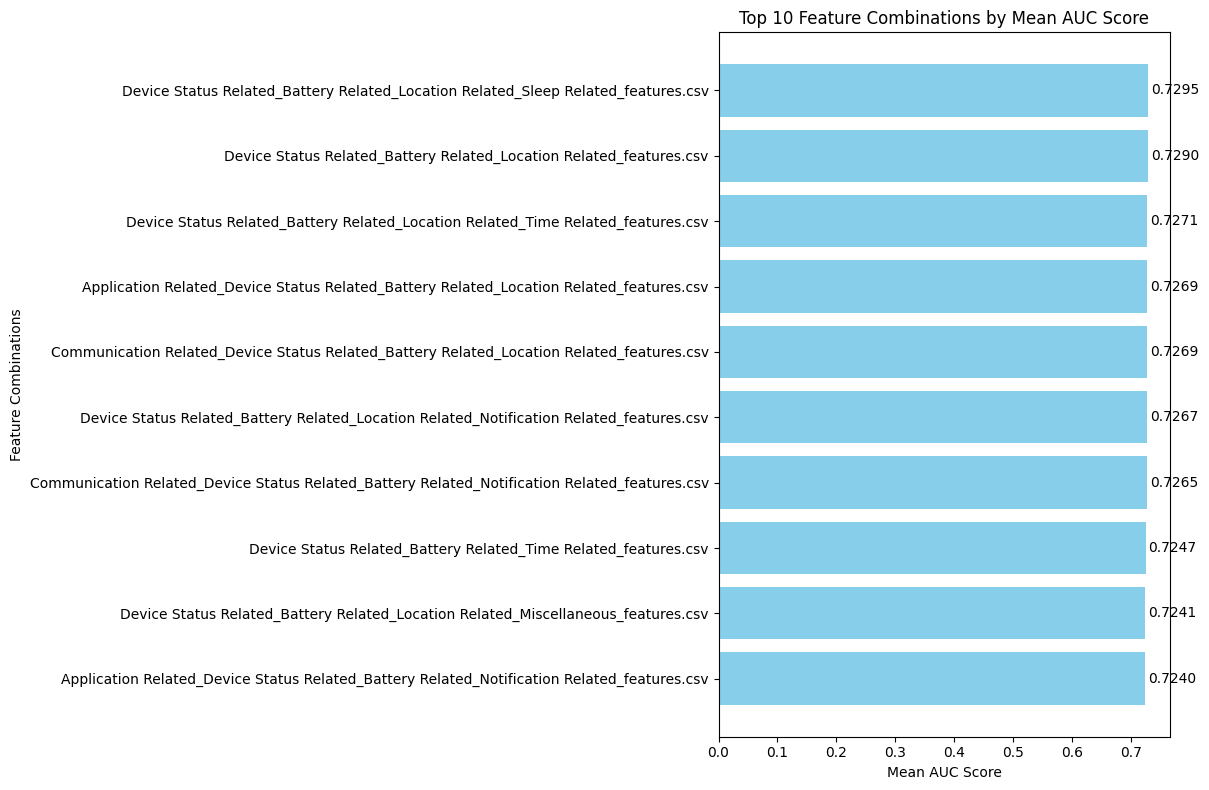

In [12]:
import matplotlib.pyplot as plt

# Number of top results to visualize
top_n = 10

# Extract the top N results
top_results = results_sorted[:top_n]

# Extract the combinations and their mean AUCs for plotting
combinations = [result['combination'] for result in top_results]
mean_aucs = [result['mean_auc'] for result in top_results]

# Create a bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(combinations, mean_aucs, color='skyblue')
plt.xlabel('Mean AUC Score')
plt.ylabel('Feature Combinations')
plt.title(f'Top {top_n} Feature Combinations by Mean AUC Score')

# Annotate the bars with the AUC score
for bar, auc in zip(bars, mean_aucs):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height() / 2, f'{auc:.4f}', va='center')

# Invert the y-axis to have the highest AUC at the top
plt.gca().invert_yaxis()

# Show the plot
plt.tight_layout()
plt.show()


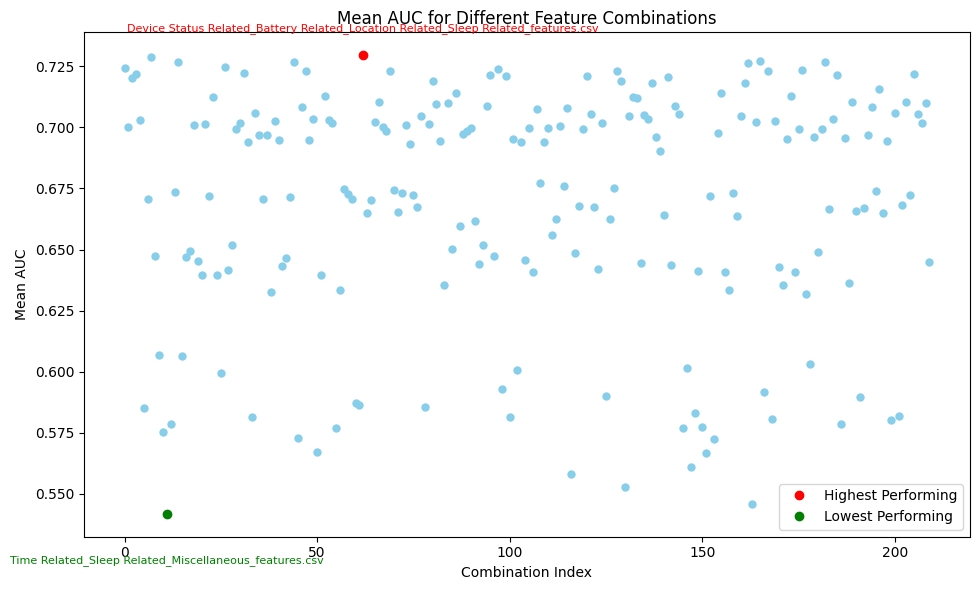

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the results
results = []

# Iterate through all the files in the directory
for file_name in os.listdir(PATH_SAVE_RESULTS):
    if file_name.endswith('.csv'):
        file_path = os.path.join(PATH_SAVE_RESULTS, file_name)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Extract the combination and mean_auc
        for _, row in df.iterrows():
            combination = row['combination']
            mean_auc = row['mean_auc']
            results.append((combination, mean_auc))

# Convert the results list to a DataFrame for easier plotting
results_df = pd.DataFrame(results, columns=['Combination', 'Mean AUC'])

# Sort the DataFrame by Mean AUC
sorted_results = results_df.sort_values(by='Mean AUC', ascending=False)

# Identify the highest and lowest performing combinations
top_combination = sorted_results.iloc[0]
bottom_combination = sorted_results.iloc[-1]

# Plot the results
plt.figure(figsize=(10, 6))

# Plot all combinations as dots
plt.plot(sorted_results['Mean AUC'], 'o', color='skyblue', markersize=5, label='_nolegend_')

# Highlight the highest and lowest performing combinations
plt.plot(sorted_results.index[0], top_combination['Mean AUC'], 'ro', label='Highest Performing')
plt.plot(sorted_results.index[-1], bottom_combination['Mean AUC'], 'go', label='Lowest Performing')

# Annotate the highest and lowest performing combinations
plt.text(sorted_results.index[0], top_combination['Mean AUC'] + 0.01, 
         top_combination['Combination'], ha='center', fontsize=8, color='red')
plt.text(sorted_results.index[-1], bottom_combination['Mean AUC'] - 0.02, 
         bottom_combination['Combination'], ha='center', fontsize=8, color='green')

plt.xlabel('Combination Index')
plt.ylabel('Mean AUC')
plt.title('Mean AUC for Different Feature Combinations')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


In [16]:
import os
import pandas as pd

# Initialize a list to store the results
results = []

# Iterate through all the files in the directory
for file_name in os.listdir(PATH_SAVE_RESULTS):
    if file_name.endswith('.csv'):
        file_path = os.path.join(PATH_SAVE_RESULTS, file_name)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Extract the combination and mean_auc
        for _, row in df.iterrows():
            combination = row['combination']
            mean_auc = row['mean_auc']
            results.append((combination, mean_auc))

# Convert the results list to a DataFrame for easier manipulation
results_df = pd.DataFrame(results, columns=['Combination', 'Mean AUC'])

# Sort the DataFrame by Mean AUC in descending order
sorted_results = results_df.sort_values(by='Mean AUC', ascending=False)

# Select the top 10 combinations
top_10_combinations = sorted_results.head(10)

# Print the top 10 combinations and their Mean AUC
print("Top 10 Combinations and Their Mean AUC:")
for i, row in top_10_combinations.iterrows():
    print(f"{i + 1}. Combination: {row['Combination']} - Mean AUC: {row['Mean AUC']:.4f}")


Top 10 Combinations and Their Mean AUC:
63. Combination: Device Status Related_Battery Related_Location Related_Sleep Related_features.csv - Mean AUC: 0.7295
8. Combination: Device Status Related_Battery Related_Location Related_features.csv - Mean AUC: 0.7290
166. Combination: Device Status Related_Battery Related_Location Related_Time Related_features.csv - Mean AUC: 0.7271
183. Combination: Application Related_Device Status Related_Battery Related_Location Related_features.csv - Mean AUC: 0.7269
45. Combination: Communication Related_Device Status Related_Battery Related_Location Related_features.csv - Mean AUC: 0.7269
15. Combination: Device Status Related_Battery Related_Location Related_Notification Related_features.csv - Mean AUC: 0.7267
163. Combination: Communication Related_Device Status Related_Battery Related_Notification Related_features.csv - Mean AUC: 0.7265
27. Combination: Device Status Related_Battery Related_Time Related_features.csv - Mean AUC: 0.7247
1. Combination

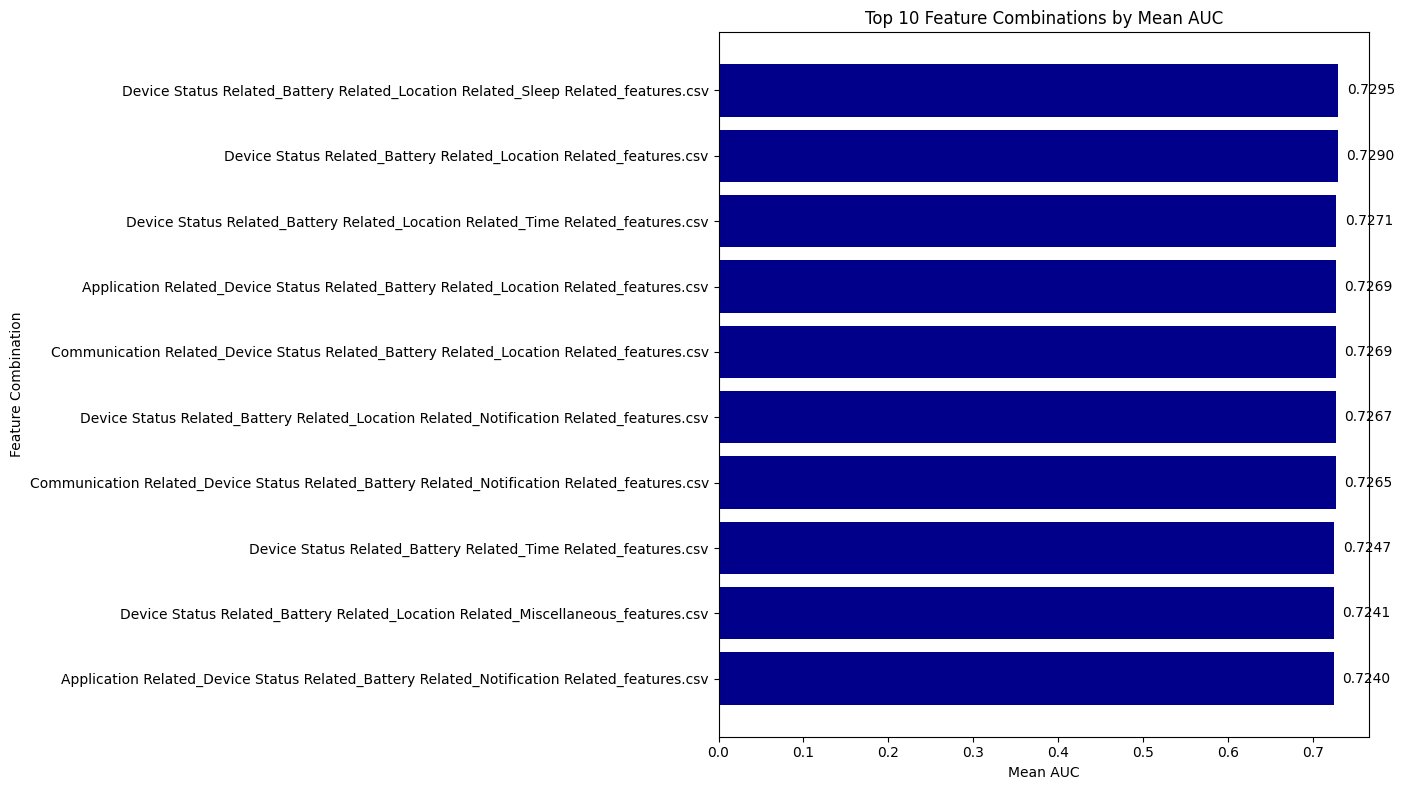

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Initialize a list to store the results
results = []

# Iterate through all the files in the directory
for file_name in os.listdir(PATH_SAVE_RESULTS):
    if file_name.endswith('.csv'):
        file_path = os.path.join(PATH_SAVE_RESULTS, file_name)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Extract the combination and mean_auc
        for _, row in df.iterrows():
            combination = row['combination']
            mean_auc = row['mean_auc']
            results.append((combination, mean_auc))

# Convert the results list to a DataFrame for easier manipulation
results_df = pd.DataFrame(results, columns=['Combination', 'Mean AUC'])

# Sort the DataFrame by Mean AUC in descending order
sorted_results = results_df.sort_values(by='Mean AUC', ascending=False)

# Select the top 10 combinations
top_10_combinations = sorted_results.head(10)

# Create the bar plot
plt.figure(figsize=(14, 8))
bars = plt.barh(top_10_combinations['Combination'], top_10_combinations['Mean AUC'], color='darkblue')

# Add AUC values on the bars
for bar, auc in zip(bars, top_10_combinations['Mean AUC']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{auc:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

# Adding labels and title
plt.xlabel('Mean AUC')
plt.ylabel('Feature Combination')
plt.title('Top 10 Feature Combinations by Mean AUC')

# Invert y-axis to have the highest AUC at the top
plt.gca().invert_yaxis()

# Display the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_58319/2099357567.py:66: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


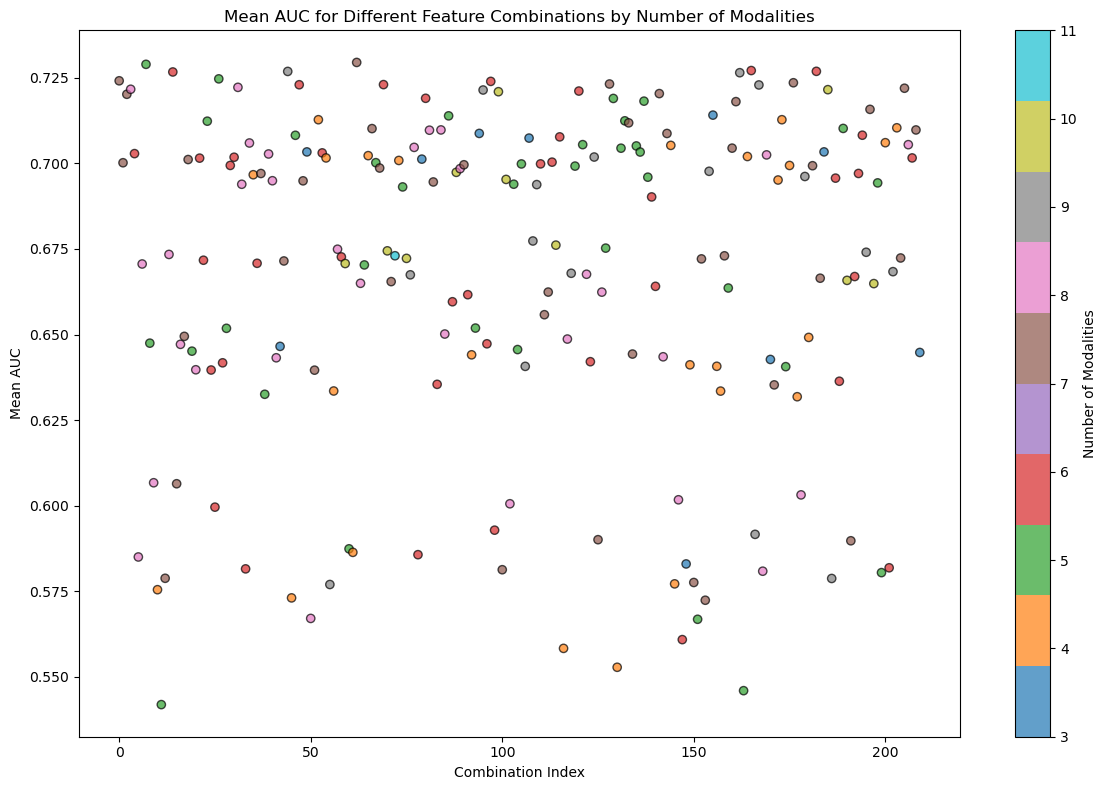

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Define the path to the directory containing the CSV files
PATH_SAVE_RESULTS = '/var/nfs_share/Overfitting/D-4/Intermediate/Results_combinations_objective/'

# Define the categories and associated tags
categories = {
    'Application Related': ['APP'],
    'Communication Related': ['CALL', 'MSG', 'RING', 'BT'],
    'Device Status Related': ['SCR', 'PWR', 'CHG'],
    'Battery Related': ['BAT'],
    'Location Related': ['LOC'],
    'Time Related': ['Time'],
    'Notification Related': ['Notification'],
    'Sleep Related': ['Sleep', 'Dozemode'],
    'Miscellaneous': ['PIF', 'INST']
}

# Function to count the number of unique categories in the filename
def count_categories_from_filename(file_name):
    clean_name = file_name.replace('result_', '').replace('_features.csv', '')
    categories_in_name = clean_name.split('_')
    return len(categories_in_name)

# Function to count the number of unique modalities in the combination
def count_modalities_from_combination(combination):
    # Split the combination into individual categories
    features = combination.split('_')
    # Initialize a counter for the number of modalities
    modality_count = 0
    # Check each feature against the categories
    for feature in features:
        for category, modality_list in categories.items():
            if category in feature:
                modality_count += len(modality_list)
    # Return the total number of modalities
    return modality_count

# Initialize a list to store the results
results = []

# Iterate through all the files in the directory
for file_name in os.listdir(PATH_SAVE_RESULTS):
    if file_name.endswith('.csv'):
        file_path = os.path.join(PATH_SAVE_RESULTS, file_name)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Count the number of categories based on the file name
        num_categories = count_categories_from_filename(file_name)
        # Extract the combination and mean_auc
        for _, row in df.iterrows():
            combination = row['combination']
            mean_auc = row['mean_auc']
            num_modalities = count_modalities_from_combination(file_name)
            results.append((combination, mean_auc, num_categories, num_modalities))

# Convert the results list to a DataFrame for easier plotting
results_df = pd.DataFrame(results, columns=['Combination', 'Mean AUC', 'Num Categories', 'Num Modalities'])

# Normalize the color scale based on the number of modalities
norm = mcolors.Normalize(vmin=results_df['Num Modalities'].min(), vmax=results_df['Num Modalities'].max())
cmap = cm.get_cmap('tab10')

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Plot all combinations as dots, with colors indicating the number of modalities
sc = plt.scatter(range(len(results_df)), results_df['Mean AUC'], 
                 c=results_df['Num Modalities'], cmap=cmap, norm=norm,
                 alpha=0.7, edgecolor='k')

# Adding labels and title
plt.xlabel('Combination Index')
plt.ylabel('Mean AUC')
plt.title('Mean AUC for Different Feature Combinations by Number of Modalities')

# Add a colorbar to show the mapping of number of modalities
cbar = plt.colorbar(sc)
cbar.set_label('Number of Modalities')

plt.tight_layout()
plt.show()


In [5]:
results_df

,Combination,Mean AUC,Num Categories,Num Modalities
0,Device Status Related_Battery Related_Location...,0.724145,4,7
1,Device Status Related_Location Related_Time Re...,0.700199,4,7
2,Application Related_Device Status Related_Batt...,0.720205,4,7
3,Communication Related_Device Status Related_Ba...,0.721672,3,8
4,Communication Related_Battery Related_Time Rel...,0.702868,3,6
...,...,...,...,...
205,Device Status Related_Battery Related_Notifica...,0.721975,4,7
206,Communication Related_Battery Related_Notifica...,0.705486,4,8
207,Application Related_Communication Related_Batt...,0.701608,3,6
208,Application Related_Communication Related_Batt...,0.709782,4,7


/tmp/ipykernel_58319/3372916778.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10')


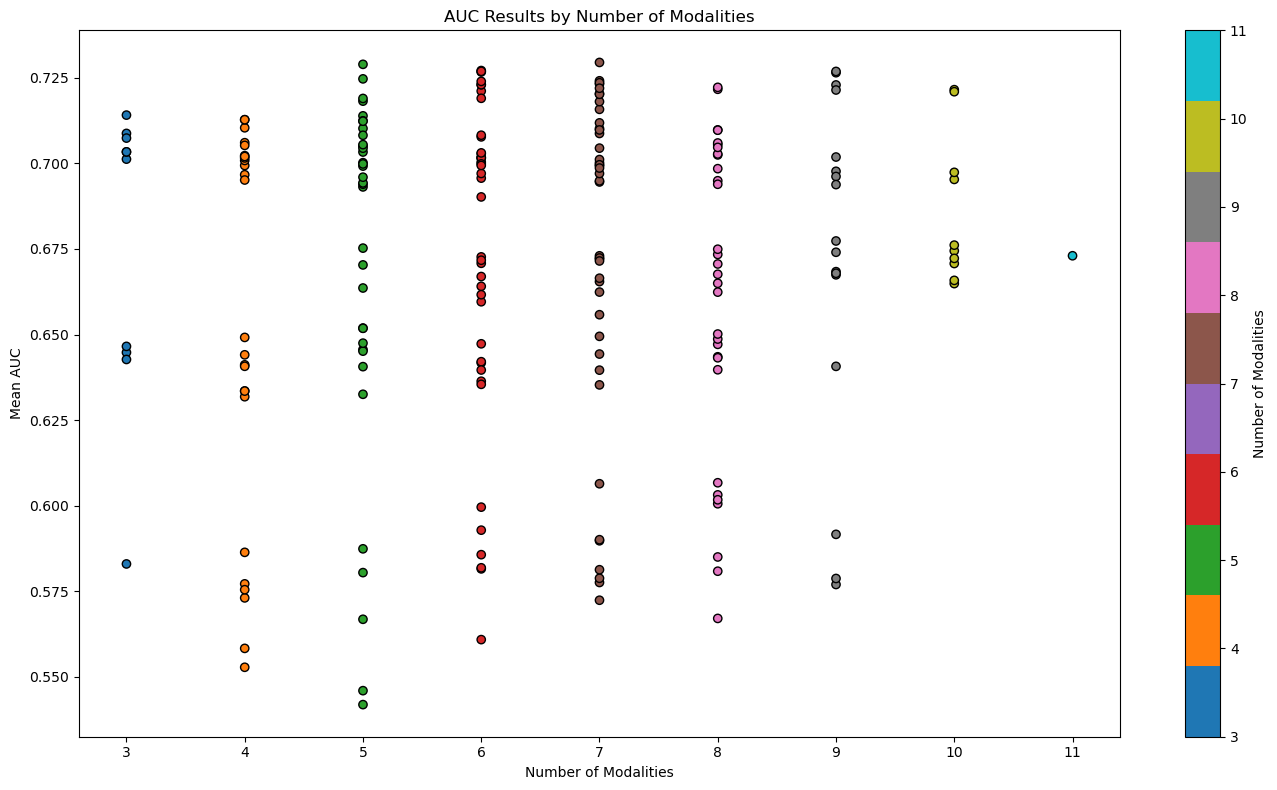

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Sort the DataFrame by the number of modalities
results_df_sorted = results_df.sort_values(by='Num Modalities', ascending=True)

# Normalize the color scale based on the number of modalities
norm = mcolors.Normalize(vmin=results_df_sorted['Num Modalities'].min(), vmax=results_df_sorted['Num Modalities'].max())
cmap = cm.get_cmap('tab10')

# Create the scatter plot
plt.figure(figsize=(14, 8))

# Scatter plot to represent each AUC value
sc = plt.scatter(results_df_sorted['Num Modalities'], results_df_sorted['Mean AUC'], 
                 c=results_df_sorted['Num Modalities'], cmap=cmap, norm=norm, edgecolor='k')

# Adding labels and title
plt.xlabel('Number of Modalities')
plt.ylabel('Mean AUC')
plt.title('AUC Results by Number of Modalities')

# Create a colorbar based on the scatter plot
cbar = plt.colorbar(sc)
cbar.set_label('Number of Modalities')

plt.tight_layout()
plt.show()
